In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors


In [2]:
df = pd.read_csv("xeek_train_subset.csv")

In [3]:
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [4]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [5]:
workingdf = df[["WELL", "DEPTH_MD", "RDEP", "RHOB", "GR", "NPHI", "PEF", "DTC", "FORCE_2020_LITHOFACIES_LITHOLOGY"]].copy()

In [6]:
workingdf

,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY
0,15/9-13,494.528000,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000
1,15/9-13,494.680000,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000
2,15/9-13,494.832000,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000
3,15/9-13,494.984000,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000
4,15/9-13,495.136000,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000
...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,5.339929,2.531374,127.456139,NaN,3.607062,NaN,30000
133194,16/2-16,2207.462396,5.689734,2.526128,128.403305,NaN,3.609151,NaN,30000
133195,16/2-16,2207.614396,5.496074,2.528934,127.829262,NaN,3.594580,NaN,30000
133196,16/2-16,2207.766396,5.345353,2.527052,126.552277,NaN,3.534883,NaN,30000


In [7]:
workingdf.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'FACIES'}, inplace=True)

In [8]:
workingdf

,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES
0,15/9-13,494.528000,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000
1,15/9-13,494.680000,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000
2,15/9-13,494.832000,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000
3,15/9-13,494.984000,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000
4,15/9-13,495.136000,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000
...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,5.339929,2.531374,127.456139,NaN,3.607062,NaN,30000
133194,16/2-16,2207.462396,5.689734,2.526128,128.403305,NaN,3.609151,NaN,30000
133195,16/2-16,2207.614396,5.496074,2.528934,127.829262,NaN,3.594580,NaN,30000
133196,16/2-16,2207.766396,5.345353,2.527052,126.552277,NaN,3.534883,NaN,30000


In [17]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [14]:
simple_lithology_numbers = {30000: 1,
                 65030: 2,
                 65000: 3,
                 80000: 4,
                 74000: 5,
                 70000: 6,
                 70032: 7,
                 88000: 8,
                 86000: 9,
                 99000: 10,
                 90000: 11,
                 93000: 12}

In [11]:
lithology_setup = {30000: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 65030: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 65000: {'lith':'Shale', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                 80000: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 74000: {'lith':'Dolomite', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                 70000: {'lith':'Limestone', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 70032: {'lith':'Chalk', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 88000: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 86000: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'', 'color':'#ff80ff'},
                 99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 93000: {'lith':'Basement', 'lith_num':12, 'hatch':'-|', 'color':'#ef138a'}}

In [18]:
workingdf['LITH'] = workingdf['FACIES'].map(lithology_numbers)

In [19]:
workingdf['LITH_SI'] = workingdf['FACIES'].map(simple_lithology_numbers)

In [20]:
workingdf

,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH,LITH_SI
0,15/9-13,494.528000,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000,Shale,3
1,15/9-13,494.680000,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000,Shale,3
2,15/9-13,494.832000,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000,Shale,3
3,15/9-13,494.984000,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000,Shale,3
4,15/9-13,495.136000,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000,Shale,3
...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,5.339929,2.531374,127.456139,NaN,3.607062,NaN,30000,Sandstone,1
133194,16/2-16,2207.462396,5.689734,2.526128,128.403305,NaN,3.609151,NaN,30000,Sandstone,1
133195,16/2-16,2207.614396,5.496074,2.528934,127.829262,NaN,3.594580,NaN,30000,Sandstone,1
133196,16/2-16,2207.766396,5.345353,2.527052,126.552277,NaN,3.534883,NaN,30000,Sandstone,1


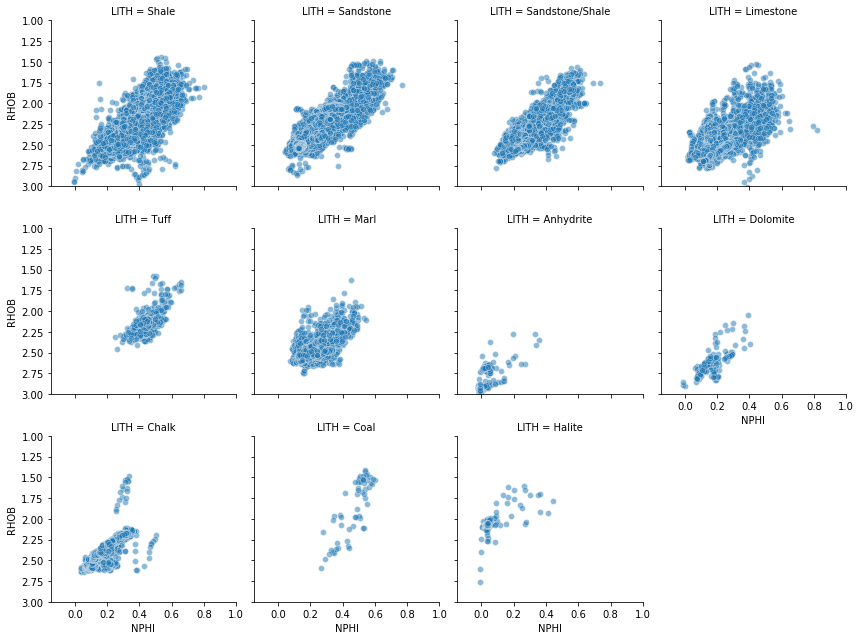

In [21]:
g = sns.FacetGrid(workingdf, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

In [22]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    facies_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red','black', 'blue']
    
            
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max()], 'indexed')
            
            cluster=np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(), 
                            extent=[0,20, depth_curve.max(), depth_curve.min()])
            
#             for key in lithology_setup.keys():
#                 color = lithology_setup[key]['color']
#                 ax[i].fill_betweenx(depth_curve, 0, dataframe[curve].max(), 
#                                   where=(dataframe[curve]==key),
#                                   facecolor=color)
#                 
        else:
            ax[i].plot(dataframe[curve], depth_curve)

        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
#         ax[i].set_ylim(3500, 3000)

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        

    
    plt.tight_layout()
    plt.show()
    
    return cmap_facies

In [24]:
grouped = workingdf.groupby('WELL')

In [25]:
grouped.head()

,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH,LITH_SI
0,15/9-13,494.528000,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000,Shale,3
1,15/9-13,494.680000,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000,Shale,3
2,15/9-13,494.832000,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000,Shale,3
3,15/9-13,494.984000,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000,Shale,3
4,15/9-13,495.136000,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000,Shale,3
18270,15/9-15,485.256000,1.735962,NaN,78.275825,NaN,NaN,161.947510,65000,Shale,3
18271,15/9-15,485.408000,1.744778,NaN,79.214615,NaN,NaN,161.267715,65000,Shale,3
18272,15/9-15,485.560000,1.752990,NaN,79.724106,NaN,NaN,160.644363,65000,Shale,3
18273,15/9-15,485.712000,1.760675,NaN,81.042778,NaN,NaN,160.212601,65000,Shale,3
18274,15/9-15,485.864000,1.767360,NaN,80.785133,NaN,NaN,160.315948,65000,Shale,3


In [26]:
# Create empty lists
dfs_wells = []
wellnames = []

#Split up the data by well
for well, data in grouped:
    dfs_wells.append(data)
    wellnames.append(well)

In [27]:
for i, well in enumerate(wellnames):
    print(f'Index: {i} - {well}')

Index: 0 - 15/9-13
Index: 1 - 15/9-15
Index: 2 - 15/9-17
Index: 3 - 16/1-2
Index: 4 - 16/1-6 A
Index: 5 - 16/10-1
Index: 6 - 16/10-2
Index: 7 - 16/10-3
Index: 8 - 16/10-5
Index: 9 - 16/11-1 ST3
Index: 10 - 16/2-11 A
Index: 11 - 16/2-16


In [28]:
curves_to_plot = ['GR', 'RDEP', 'RHOB', 'NPHI', 'PEF', 'DTC', 'LITH_SI']
logarithmic_curves = ['RDEP']
facies_curve=['LITH_SI']

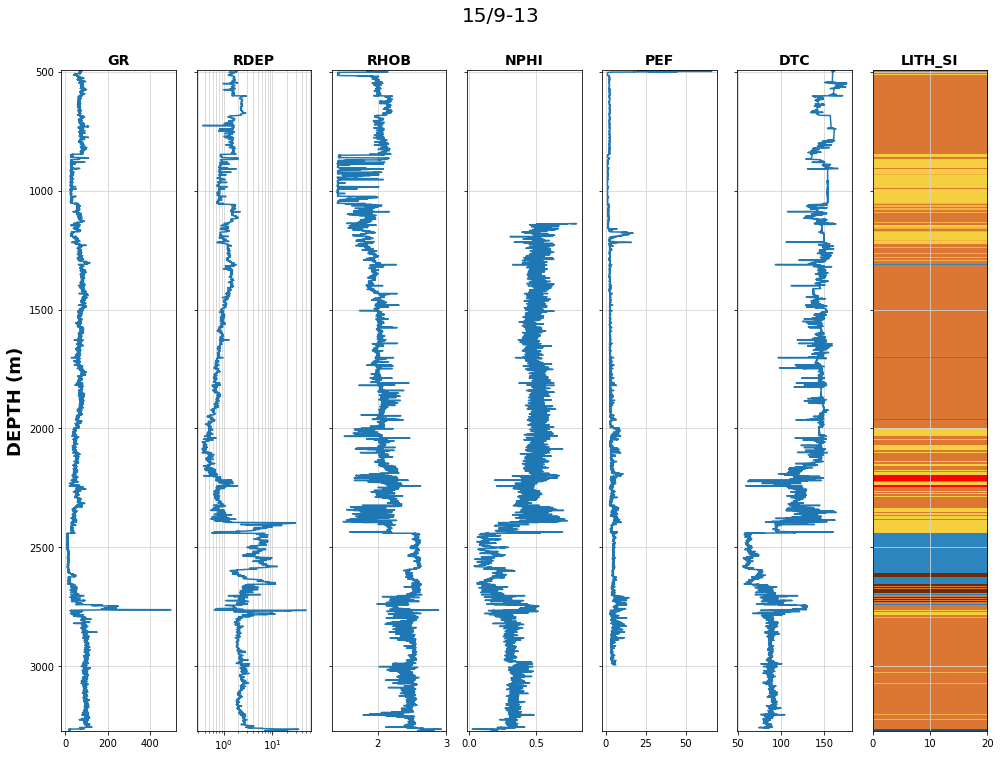

In [29]:
well = 0
create_plot(wellnames[well], 
            dfs_wells[well], 
            curves_to_plot, 
            dfs_wells[well]['DEPTH_MD'], 
            logarithmic_curves, facies_curve)

## Clustering - Unsupervised

In [30]:
from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans

In [31]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
    

In [32]:
workingdf.dropna(inplace=True)

In [33]:
workingdf.describe()

,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH_SI
count,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000
mean,2026.091770,1.949349,2.216580,67.769272,0.364413,4.617041,116.211408,62691.493352,3.355848
std,622.447842,16.295946,0.225473,36.640160,0.139758,3.937549,30.752148,13172.216175,1.671553
min,705.550396,0.123068,1.412190,5.782680,-0.005300,1.126667,7.415132,30000.000000,1.000000
25%,1516.358446,0.737603,2.034906,44.220089,0.243001,3.140069,86.331350,65000.000000,3.000000
50%,2010.897600,1.098597,2.178304,64.679111,0.403345,4.012710,125.787430,65000.000000,3.000000
75%,2569.647947,1.771478,2.421446,87.443424,0.484445,5.247028,144.037128,65030.000000,3.000000
max,3198.760000,1856.935059,3.005321,804.298950,0.800262,288.103638,230.432953,99000.000000,11.000000


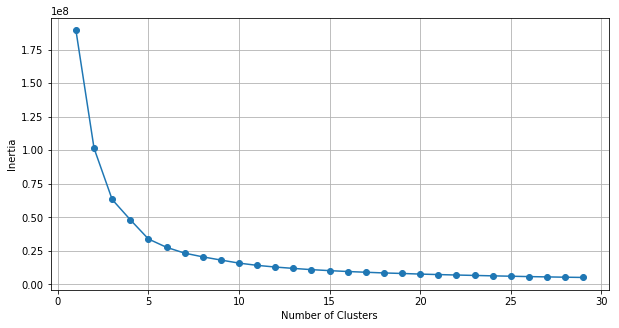

In [34]:
optimise_k_means(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']], 30)

In [35]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']])

workingdf['Clusters'] = kmeans.labels_

In [36]:
grouped_nan = workingdf.groupby('WELL')


In [37]:
grouped_nan.head()

,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH,LITH_SI,Clusters
4238,15/9-13,1138.704000,1.091499,1.774626,55.892757,0.765867,1.631495,147.837677,30000,Sandstone,1,2
4239,15/9-13,1138.856000,1.122706,1.800986,60.929138,0.800262,1.645080,142.382431,65000,Shale,3,2
4240,15/9-13,1139.008000,1.148141,1.817696,62.117264,0.765957,1.645873,138.258331,65000,Shale,3,2
4241,15/9-13,1139.160000,1.170984,1.829333,61.010860,0.702521,1.620216,139.198914,65000,Shale,3,2
4242,15/9-13,1139.312000,1.184080,1.813854,58.501236,0.639708,1.504854,144.290085,65000,Shale,3,2
22641,15/9-15,1149.648000,1.714187,2.063168,68.388885,0.541850,2.583011,134.226379,65000,Shale,3,2
22642,15/9-15,1149.800000,1.716345,2.051136,71.170013,0.545401,2.506672,134.824799,65000,Shale,3,8
22643,15/9-15,1149.952000,1.719259,2.041540,74.497498,0.548953,2.427594,135.037079,65000,Shale,3,8
22644,15/9-15,1150.104000,1.723307,2.035698,76.098335,0.549356,2.401553,134.500336,65000,Shale,3,8
22645,15/9-15,1150.256000,1.729302,2.029099,74.966675,0.543351,2.358777,132.162399,65000,Shale,3,8


In [38]:
# Create empty lists
dfs_wells = []
wellnames = []

#Split up the data by well
for well, data in grouped_nan:
    dfs_wells.append(data)
    wellnames.append(well)

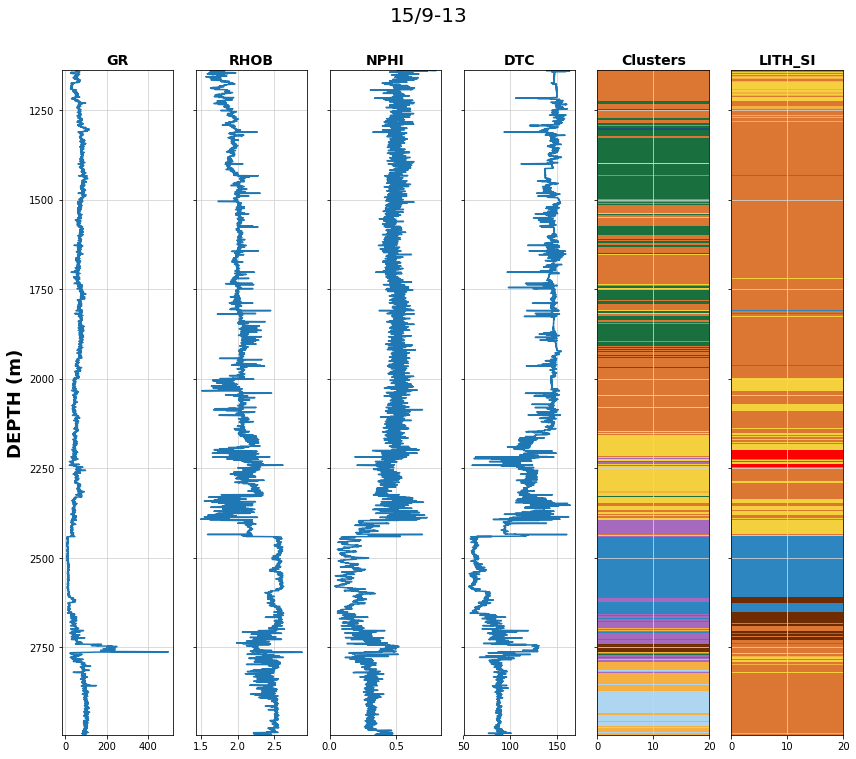

In [62]:
curves_to_plot = ['GR', 'RHOB', 'NPHI', 'DTC', 'Clusters', 'LITH_SI']
logarithmic_curves = ['RDEP']
facies_curve=['Clusters', 'LITH_SI']

well = 0
cmap_facies = create_plot(wellnames[well], 
            dfs_wells[well], 
            curves_to_plot, 
            dfs_wells[well]['DEPTH_MD'], 
            logarithmic_curves, facies_curve)

In [40]:
dfs_wells[2].describe()

,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH_SI,Clusters
count,13058.000000,13058.000000,13058.000000,13058.000000,13058.000000,13058.000000,13058.000000,13058.000000,13058.000000,13058.000000
mean,2105.812756,1.847915,2.154302,56.760811,0.385386,4.245147,120.278062,63739.477715,3.343544,3.156379
std,576.063575,2.145143,0.235986,24.235365,0.136979,2.117278,27.847140,11670.694662,1.575519,2.571110
min,1012.637998,0.256800,1.492112,5.951932,0.018600,1.511745,40.766048,30000.000000,1.000000,0.000000
25%,1608.667998,0.758882,1.978594,41.539297,0.265904,2.984909,90.183762,65000.000000,3.000000,2.000000
50%,2104.833998,1.139345,2.083876,57.861465,0.452295,3.740604,133.306526,65000.000000,3.000000,2.000000
75%,2600.999998,1.830315,2.354683,70.462805,0.497684,5.044729,145.347706,65000.000000,3.000000,5.000000
max,3110.541998,27.965343,2.906611,119.460411,0.610906,50.412731,165.113022,99000.000000,10.000000,8.000000


In [41]:
dfs_wells[2]['Clusters'].nunique()

8

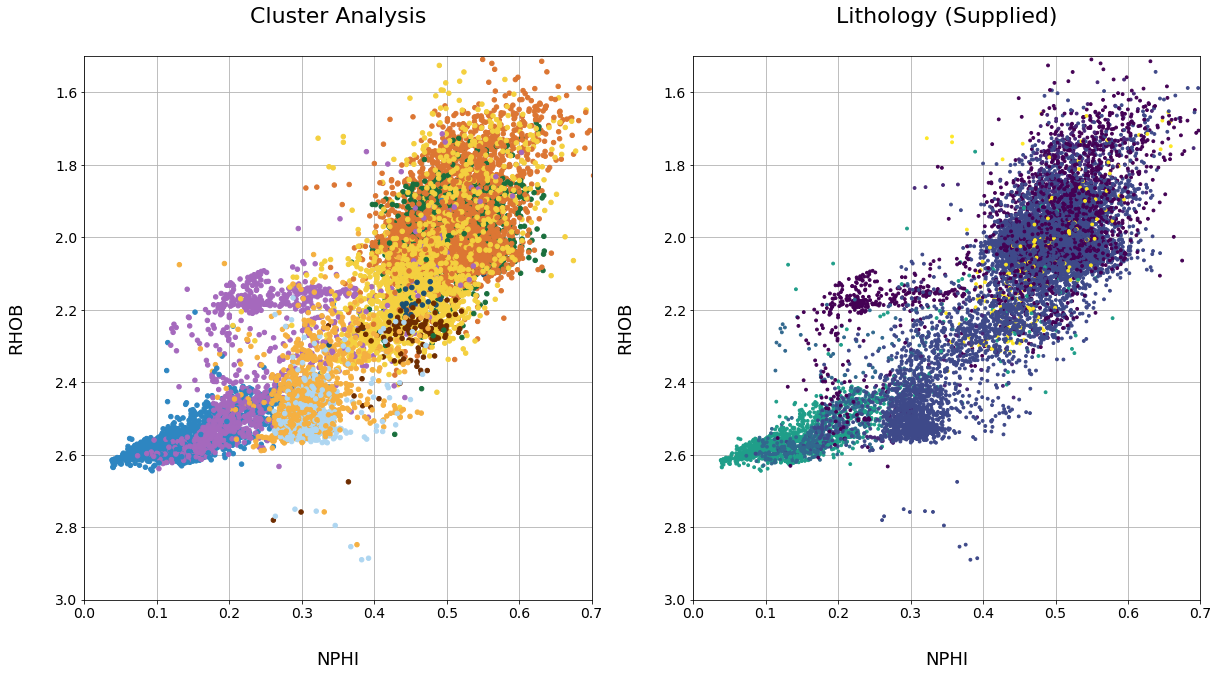

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
ax1 = plt.subplot2grid((1,2), (0,0))
ax1.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['Clusters'], s=20, cmap=cmap_facies)
ax1.set_title('Cluster Analysis', fontsize=22, y=1.05)

ax2 = plt.subplot2grid((1,2), (0,1))
ax2.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['LITH_SI'], s=8)
ax2.set_title('Lithology (Supplied)', fontsize=22, y=1.05)

for ax in [ax1, ax2]:
    ax.set_xlim(0, 0.7)
    ax.set_ylim(3, 1.5)
    ax.set_ylabel('RHOB', fontsize=18, labelpad=30)
    ax.set_xlabel('NPHI', fontsize=18, labelpad=30)
    ax.grid()
    ax.set_axisbelow(True)

    ax.tick_params(axis='both', labelsize=14)

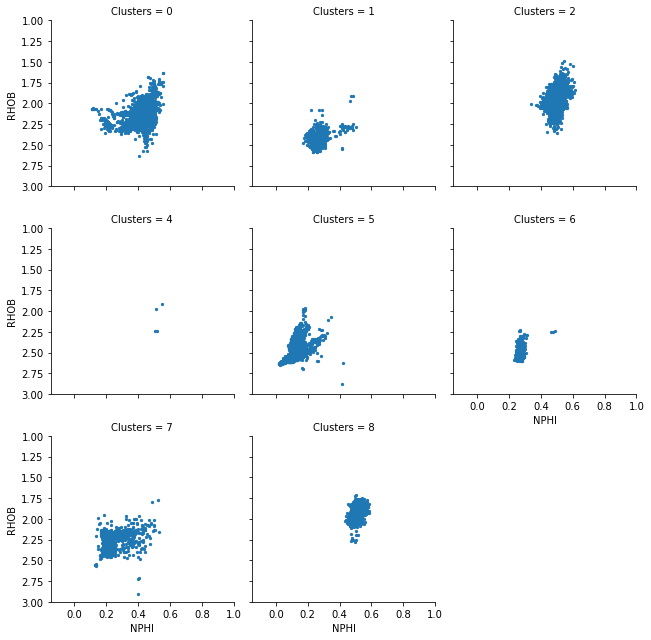

In [61]:
g = sns.FacetGrid(dfs_wells[2], col='Clusters', col_wrap=3)
g.map(plt.scatter, 'NPHI', 'RHOB',  cmap=cmap_facies, marker='.', s=20)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

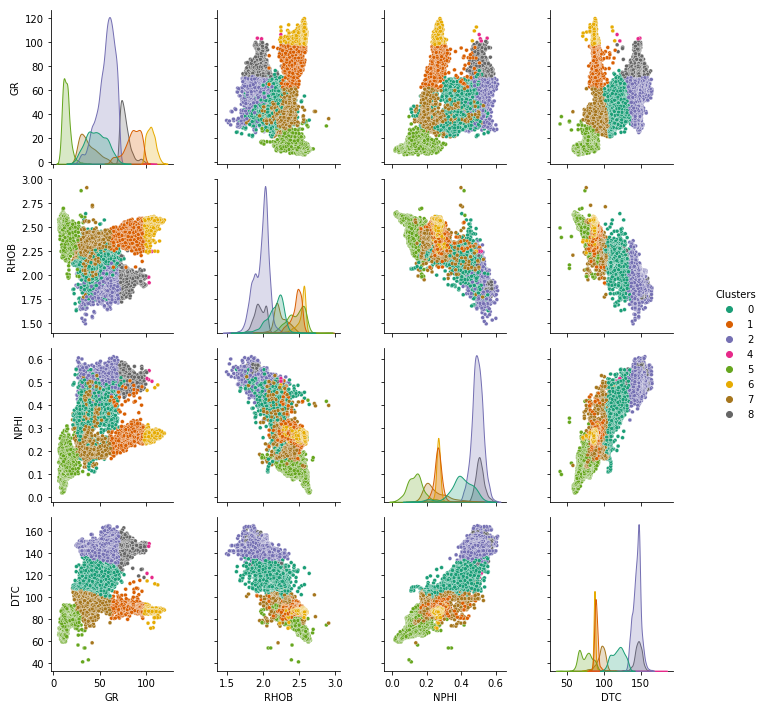

In [85]:
sns.pairplot(dfs_wells[2], vars=['GR', 'RHOB','NPHI', 'DTC'], hue='Clusters', palette='Dark2',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})